In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
# LOADING DATASET

In [4]:
df = pd.read_csv('twitter-suicidal_data.csv')
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [5]:
# datatype info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB


<AxesSubplot:>

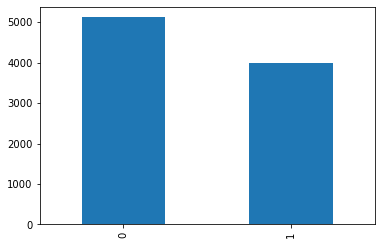

In [6]:
df['intention'].value_counts()
df['intention'].value_counts().plot(kind='bar')

In [ ]:
x = df['tweet'].values
y = df['intention'].values
#data visualization 
import seaborn as sns 
sns.distplot(df['intention'])

In [8]:
# PREPROSESING THE DATASET

# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.subword(word, "", input_txt)
    return input_txt

In [9]:
# Removing Twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [10]:
df.head()

,tweet,intention,clean_tweet
0,my life is meaningless i just want to end my l...,1,my life is meaningless i just want to end my l...
1,muttering i wanna die to myself daily for a fe...,1,muttering i wanna die to myself daily for a fe...
2,work slave i really feel like my only purpose ...,1,work slave i really feel like my only purpose ...
3,i did something on the 2 of october i overdose...,1,i did something on the 2 of october i overdose...
4,i feel like no one cares i just want to die ma...,1,i feel like no one cares i just want to die ma...


In [11]:
# Remove special characters, numers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,tweet,intention,clean_tweet
0,my life is meaningless i just want to end my l...,1,my life is meaningless i just want to end my l...
1,muttering i wanna die to myself daily for a fe...,1,muttering i wanna die to myself daily for a fe...
2,work slave i really feel like my only purpose ...,1,work slave i really feel like my only purpose ...
3,i did something on the 2 of october i overdose...,1,i did something on the of october i overdose...
4,i feel like no one cares i just want to die ma...,1,i feel like no one cares i just want to die ma...


In [12]:
# Remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,tweet,intention,clean_tweet
0,my life is meaningless i just want to end my l...,1,life meaningless just want life badly life com...
1,muttering i wanna die to myself daily for a fe...,1,muttering wanna myself daily months feel worth...
2,work slave i really feel like my only purpose ...,1,work slave really feel like only purpose life ...
3,i did something on the 2 of october i overdose...,1,something october overdosed just felt alone ho...
4,i feel like no one cares i just want to die ma...,1,feel like cares just want maybe then feel less...


In [13]:
# Tokenization
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [life, meaningless, just, want, life, badly, l...
1    [muttering, wanna, myself, daily, months, feel...
2    [work, slave, really, feel, like, only, purpos...
3    [something, october, overdosed, just, felt, al...
4    [feel, like, cares, just, want, maybe, then, f...
Name: clean_tweet, dtype: object

In [14]:
# Steming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [life, meaningless, just, want, life, badli, l...
1    [mutter, wanna, myself, daili, month, feel, wo...
2    [work, slave, realli, feel, like, onli, purpos...
3    [someth, octob, overdos, just, felt, alon, hor...
4    [feel, like, care, just, want, mayb, then, fee...
Name: clean_tweet, dtype: object

In [15]:
#Combine into single string
for i in range(len(tokenized_tweet)): 
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()


,tweet,intention,clean_tweet
0,my life is meaningless i just want to end my l...,1,life meaningless just want life badli life com...
1,muttering i wanna die to myself daily for a fe...,1,mutter wanna myself daili month feel worthless...
2,work slave i really feel like my only purpose ...,1,work slave realli feel like onli purpos life m...
3,i did something on the 2 of october i overdose...,1,someth octob overdos just felt alon horribl ho...
4,i feel like no one cares i just want to die ma...,1,feel like care just want mayb then feel less lone


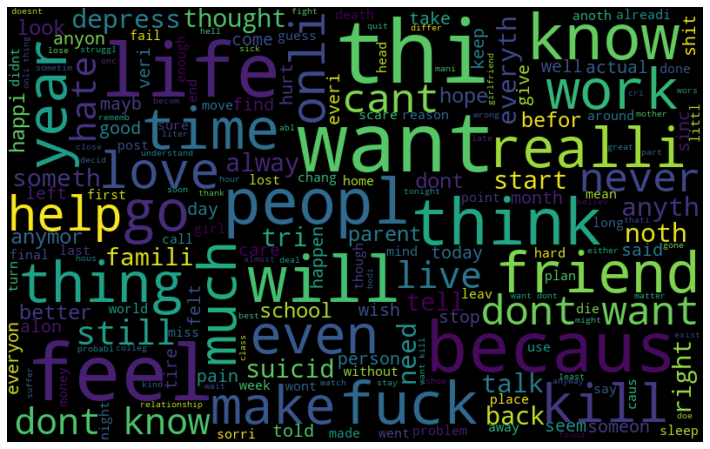

In [16]:
# EXPLORATORY DATA ANALYSIS

# Visualize frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

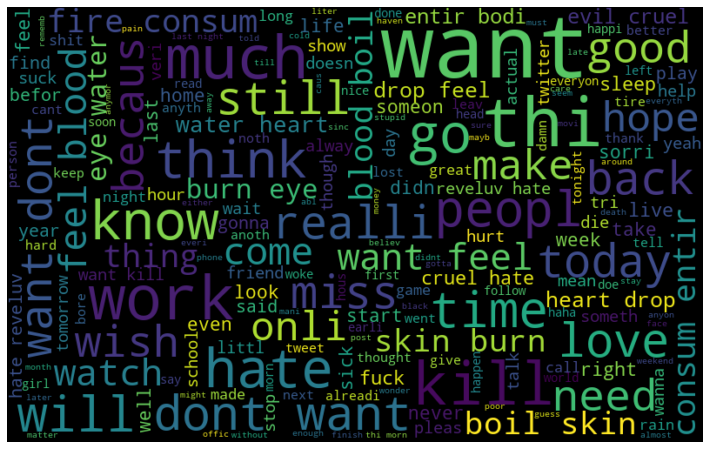

In [17]:
# Visualize frequent POSITIVE words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['intention']==0]])


wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

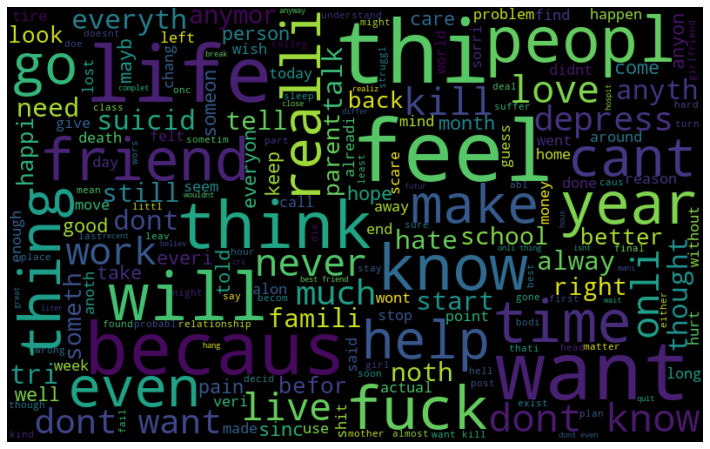

In [18]:
# Visualize frequent NEGATIVE words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['intention']==1]])


wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# # extraction of hashtags
# def hashtag_extract(tweets):
#     hashtags = []
#     #loop words in the tweet
#     for tweet in tweets:
#         ht = re.findall(r"#(\w+)", tweet)
#         hashtags.append(ht)
#     return hashtags

In [20]:
# # Extract POSITIVE HASHTAGS
# ht_positive = hashtag_extract(df['clean_tweet'][df['intention']==0])

# # Extract NEGATIVE HASHTAGS
# ht_negative = hashtag_extract(df['clean_tweet'][df['intention']==1])

In [21]:
# ht_positive[:5]

In [22]:
# #unnest list
# ht_positive = sum(ht_positive, [])
# ht_negative = sum(ht_negative, [])

In [23]:
# ht_positive[:5]

In [24]:
# freq = nltk.FreqDist(ht_positive)
# d = pd.DataFrame({'Hashtag': list(freq.keys()),
#                  'Count': list(freq.values())})
# d.head()

In [25]:
# Select top 10 hashtags
# d = d.nlargest(columns='Count', n=10)
# plt.figure(figsize=(15,9))
# sns.barplot(data=d, x='Hashtag', y='Count')
# plt.show()

In [26]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=100, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [27]:
# bow[0].toarray()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['intention'], random_state=42, test_size=0.25)
x_train

<6839x100 sparse matrix of type '<class 'numpy.int64'>'
	with 59976 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [30]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)


# #METHOD 2
# from sklearn.svm import SVC #from support vector machines import support vector classifier
# model = SVC()
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)
# y_pred
# from sklearn.metrics import accuracy_score 
# accuracy_score(y_pred,y_test)

LogisticRegression()

In [31]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.8703898840885143

In [32]:
accuracy_score(y_test, pred)

0.8921052631578947

In [33]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >=0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.8680935788949726

In [34]:
accuracy_score(y_test, pred)

0.8837719298245614

In [35]:
pred_prob[0][1] >= 0.3

False

In [36]:
# JOBLIB AND PICKLE
import pickle
filename= 'exp_suicide'
pickle.dump(model,open(filename,'wb'))

In [37]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [38]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("Suicide Detection")
reload_model = joblib.load('exp_suicide')

ip = st.text_input("Enter thetext :")
op = reload_model.predict([ip])
if st.button('PREDICT'):
  #st.title(op[0])
  if op[0]==1:
    st.subheader("Suicidal")
  elif op[0]==0:
    st.subheader("Not suicidal")
  else:
    print("wait..!")

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501